In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy.stats import norm, t
import theano.tensor as tt

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/scalar/basic.py:2412: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.ctor = getattr(np, o_type.dtype)
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/pymc3/__init__.py:34: DeprecationWarning: Function 'semver.match' is deprecated. Deprecated since version 2.10.0.  This function will be removed in semver 3. Use the respective 'semver.VersionInfo.match' instead.
  if not semver.match(theano.__version__, ">=1.1.2"):
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version ins

In [2]:
s = np.array([34,21,17,21,31,31,18,22,34,35,35,36,39.36,35])# data

In [27]:
with pm.Model() as model_1:
    I=pm.Bernoulli('I',p=0.5,shape=len(s))
    pk=pm.Uniform('pk',lower=0.5,upper=1)
    pg=pm.Uniform('pg',lower=0.45,upper=0.55)
    theta=pm.Deterministic('theta',pk*tt.eq(I,1)+pg*tt.eq(I,0))
    si=pm.Binomial('si',n=40,p=theta,observed=s)

In [28]:
with model_1:
    samples=pm.sample(draws=8000,tune=1000)

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.c

Sampling 4 chains for 1_000 tune and 8_000 draw iterations (4_000 + 32_000 draws total) took 21 seconds.
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(

In [32]:
pm.Bound()

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")


array([[<AxesSubplot:title={'center':'pk'}>,
        <AxesSubplot:title={'center':'pk'}>],
       [<AxesSubplot:title={'center':'pg'}>,
        <AxesSubplot:title={'center':'pg'}>]], dtype=object)

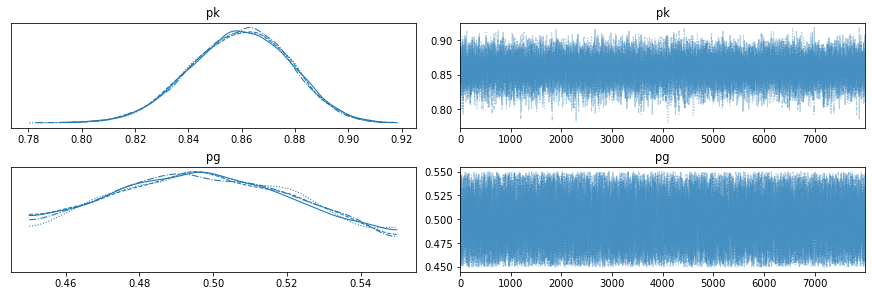

In [29]:
az.plot_trace(samples,var_names=['pk','pg'],compact=True)

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


<AxesSubplot:title={'center':'pk'}>

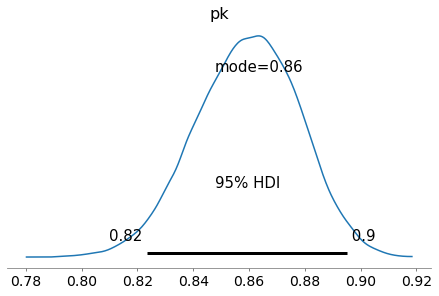

In [30]:
az.plot_posterior(samples,var_names=['pk'],point_estimate='mode',hdi_prob=0.95)